# Knn Metrics

#### This wea below serves the purpose of getting all Knn metrics from the directory into a dataframe:

In [53]:
import os
import pandas as pd
import numpy as np

metric_dump_dir='../results/knn_metrics/'
metric_files = os.listdir(metric_dump_dir)

all_metrics = []
for filename in metric_files:
    transient_df = pd.read_csv(metric_dump_dir + filename)
    transient_df['groundTruth'] = transient_df['groundTruth'].map(eval).map(np.array)
    transient_df['prediction'] = transient_df['prediction'].map(eval).map(np.array)
    
    # this only works if the filename has only one numeric parameter
    digits = [s for s in filename if s.isdigit()]
    k = int("".join(digits))
    transient_df['k'] = k 
    
    all_metrics.append(transient_df)
    
all_metrics = pd.concat(all_metrics).reset_index(drop=True)
print('all_metrics.shape')
print(all_metrics.shape)
all_metrics.head()


all_metrics.shape
(30, 4)


,accuracy,groundTruth,prediction,k
0,0.963415,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 18, 5, 6, 6, 7, 7, 8,...",1
1,0.951220,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 25, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8,...",1
2,0.975610,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[25, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8,...",1
3,1.000000,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...",1
4,1.000000,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...",1


#### Compute metrics:

In [62]:
def recall_at_k(truth_vs_pred, person):
    positive_examples = truth_vs_pred[truth_vs_pred['groundTruth'] == person]
    recall = sum(positive_examples['match']) / float(len(positive_examples['match']))
    return recall

def precision_at_k(truth_vs_pred, person):
    retrieved_examples = truth_vs_pred[truth_vs_pred['prediction'] == person]
    precision = sum(retrieved_examples['match']) / float(len(positive_examples['match']))
    return precision

def average_recall(truth_vs_pred):
    all_recalls = [recall_at_k(truth_vs_pred, i) for i in range(1,42)]
    return np.mean(all_recalls)

def average_precision(truth_vs_pred):
    all_precision = [precision_at_k(truth_vs_pred, i) for i in range(1,42)]
    return np.mean(all_precision)

def make_matches_df(groundTruth, prediction):
    truth_vs_pred = pd.DataFrame({'groundTruth':groundTruth, 'prediction':prediction})
    truth_vs_pred['match'] = truth_vs_pred['groundTruth'] == truth_vs_pred['prediction']
    return truth_vs_pred

groundTruth, prediction = all_metrics[['groundTruth','prediction']].iloc[2]
truth_vs_pred = make_matches_df(groundTruth, prediction)
r = average_recall(truth_vs_pred)
p = average_precision(truth_vs_pred)

print('recall {}'.format(r))
print('precision at {}'.format(p))


recall 0.975609756098
precision at 0.975609756098


In [68]:
recall = [average_recall(make_matches_df(*row[1].values))
                                   for row in all_metrics[['groundTruth','prediction']].iterrows()]
precision = [average_precision(make_matches_df(*row[1].values))
                                   for row in all_metrics[['groundTruth','prediction']].iterrows()]
all_metrics['recall'] = recall
all_metrics['precision'] = precision
all_metrics['F1'] = 2 * all_metrics['recall'] * all_metrics['precision'] / (all_metrics['recall'] + all_metrics['precision'] )
all_metrics.head()

,accuracy,groundTruth,prediction,k,confusion_matrix,recalls,precisions,recall,precision,F1
0,0.963415,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 18, 5, 6, 6, 7, 7, 8,...",1,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.963415,0.963415,0.963415,0.963415,0.963415
1,0.951220,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 25, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8,...",1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.951220,0.951220,0.951220,0.951220,0.951220
2,0.975610,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[25, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8,...",1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.975610,0.975610,0.975610,0.975610,0.975610
3,1.000000,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...",1,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...",1,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.000000,1.000000,1.000000,1.000000,1.000000


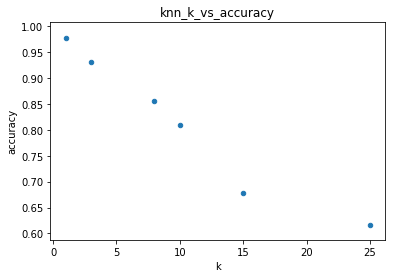

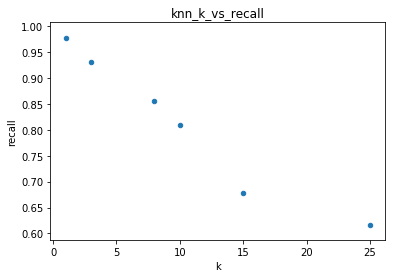

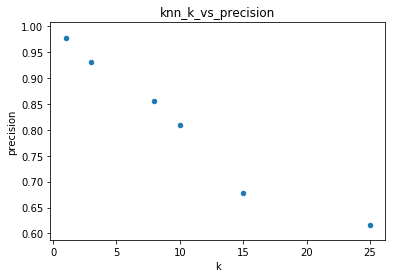

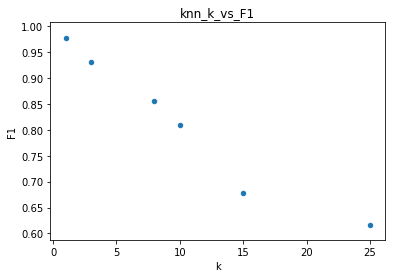

In [69]:
%matplotlib inline
def plot_k_vs_metric(metric_name):
    acc_per_k = all_metrics.groupby(['k'],as_index=False)[metric_name].mean()
    plotname = 'knn_k_vs_{}'.format(metric_name)
    acc_per_k.plot.scatter(x='k',y=metric_name, title=plotname)
plot_k_vs_metric('accuracy')
plot_k_vs_metric('recall')
plot_k_vs_metric('precision')
plot_k_vs_metric('F1')



#### Calculate and plot confusion matrices

In [54]:
from sklearn.metrics import confusion_matrix
all_metrics['confusion_matrix'] = [confusion_matrix(*row[1].values) 
                                   for row in all_metrics[['groundTruth','prediction']].iterrows()]
all_metrics.head()

,accuracy,groundTruth,prediction,k,confusion_matrix
0,0.963415,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 18, 5, 6, 6, 7, 7, 8,...",1,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.951220,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 25, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8,...",1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.975610,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[25, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8,...",1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1.000000,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...",1,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1.000000,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...","[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, ...",1,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Confusion matrix for k = 1


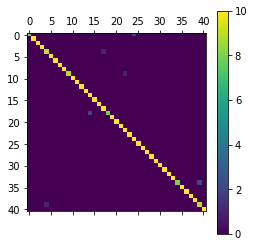

Confusion matrix for k = 3


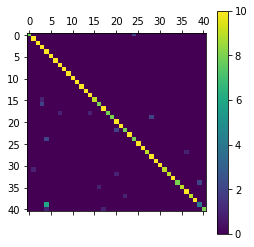

Confusion matrix for k = 8


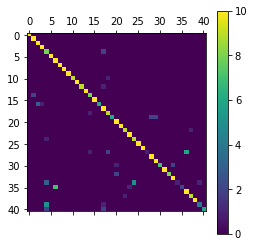

Confusion matrix for k = 10


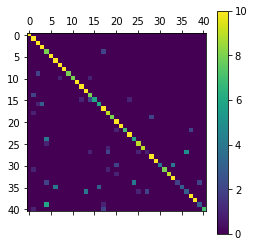

Confusion matrix for k = 15


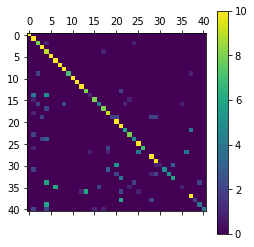

Confusion matrix for k = 25


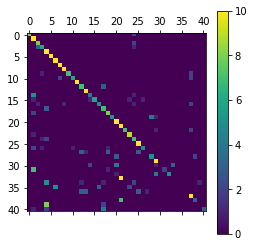

In [56]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cnf_matrix):
    plt.matshow(cnf_matrix)
    plt.colorbar()
    plt.show()

grouped_matrices =  all_metrics.groupby(['k'],as_index=False)['confusion_matrix'].sum()
for k in sorted(list(set(grouped_matrices['k'])), key=int):
    print('Confusion matrix for k = {}'.format(k))
    plot_confusion_matrix(*grouped_matrices[grouped_matrices['k'] == k]['confusion_matrix'].values)